# Gender Prediction for Scenario 1

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing all datasets
df = pd.read_parquet("Final_data_k/scenario_1.parquet")
df.head()

,device_id,brand,model,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,saturday_counts,sunday_counts,category,cluster,gender,age
0,-7548291590301750000,Huawei,è£è€€3C,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,0.0,45.0,"industry tag,nature ,personal effectiveness ,i...",0,M,33
1,-1819925713085810000,OPPO,N1 Mini,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,4.0,6.0,"industry tag,im,relatives ,notes,personal effe...",0,F,23
2,3670076507269740000,Meizu,menote1 2,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,16.0,13.0,"radio,industry tag,cozy ,services",1,M,33
3,5333872006968810000,Xiaomi,xnote,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,"debit and credit,others,im,industry tag,relati...",2,M,34
4,5263633571423510000,Huawei,hu1 Plus,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,7.0,0.0,"im,industry tag,relatives ,services ,weibo,not...",0,M,27


## Data Preparation

In [4]:
# creating a dict 
gender = {'M': 1,'F': 0}
  
# traversing through dataframe gender column and writing values where key matches
df.gender = [gender[item] for item in df.gender]

In [5]:
df.head()

,device_id,brand,model,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,saturday_counts,sunday_counts,category,cluster,gender,age
0,-7548291590301750000,Huawei,è£è€€3C,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,0.0,45.0,"industry tag,nature ,personal effectiveness ,i...",0,1,33
1,-1819925713085810000,OPPO,N1 Mini,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,4.0,6.0,"industry tag,im,relatives ,notes,personal effe...",0,0,23
2,3670076507269740000,Meizu,menote1 2,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,16.0,13.0,"radio,industry tag,cozy ,services",1,1,33
3,5333872006968810000,Xiaomi,xnote,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,"debit and credit,others,im,industry tag,relati...",2,1,34
4,5263633571423510000,Huawei,hu1 Plus,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,7.0,0.0,"im,industry tag,relatives ,services ,weibo,not...",0,1,27


In [6]:
df.category = df.category.str.split(',')

In [7]:
df.head()

,device_id,brand,model,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,saturday_counts,sunday_counts,category,cluster,gender,age
0,-7548291590301750000,Huawei,è£è€€3C,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,0.0,45.0,"[industry tag, nature , personal effectiveness...",0,1,33
1,-1819925713085810000,OPPO,N1 Mini,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,4.0,6.0,"[industry tag, im, relatives , notes, personal...",0,0,23
2,3670076507269740000,Meizu,menote1 2,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,16.0,13.0,"[radio, industry tag, cozy , services ]",1,1,33
3,5333872006968810000,Xiaomi,xnote,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,"[debit and credit, others, im, industry tag, r...",2,1,34
4,5263633571423510000,Huawei,hu1 Plus,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,7.0,0.0,"[im, industry tag, relatives , services , weib...",0,1,27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23144 entries, 0 to 23143
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   device_id             23144 non-null  int64  
 1   brand                 23144 non-null  object 
 2   model                 23144 non-null  object 
 3   midnight_counts       23144 non-null  float64
 4   daytime_counts        23144 non-null  float64
 5   early_morning_counts  23144 non-null  float64
 6   night_counts          23144 non-null  float64
 7   monday_counts         23144 non-null  float64
 8   tuesday_counts        23144 non-null  float64
 9   wednesday_counts      23144 non-null  float64
 10  thursday_counts       23144 non-null  float64
 11  friday_counts         23144 non-null  float64
 12  saturday_counts       23144 non-null  float64
 13  sunday_counts         23144 non-null  float64
 14  category              23144 non-null  object 
 15  cluster            

In [9]:
df.category.loc[df.category.isnull()] = df.category.loc[df.category.isnull()].apply(lambda x: [])

In [10]:
#one-hot encoding for categories
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('category')),
                          columns=mlb.classes_,
                          index=df.index))

In [11]:
# converting type of columns to 'category'
df['brand'] = df['brand'].astype('category')
df['model'] = df['model'].astype('category')
df['cluster'] = df['cluster'].astype('category')
df['gender'] = df['gender'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23144 entries, 0 to 23143
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   device_id                23144 non-null  int64   
 1   brand                    23144 non-null  category
 2   model                    23144 non-null  category
 3   midnight_counts          23144 non-null  float64 
 4   daytime_counts           23144 non-null  float64 
 5   early_morning_counts     23144 non-null  float64 
 6   night_counts             23144 non-null  float64 
 7   monday_counts            23144 non-null  float64 
 8   tuesday_counts           23144 non-null  float64 
 9   wednesday_counts         23144 non-null  float64 
 10  thursday_counts          23144 non-null  float64 
 11  friday_counts            23144 non-null  float64 
 12  saturday_counts          23144 non-null  float64 
 13  sunday_counts            23144 non-null  float64 
 14  cluste

In [13]:
df.head()

,device_id,brand,model,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,...,smart shopping,sports and gym,taxi,technology information,tencent,third party payment,total cost,video,wealth management,weibo
0,-7548291590301750000,Huawei,è£è€€3C,73.0,166.0,31.0,22.0,62.0,86.0,93.0,...,0,0,0,1,0,0,0,0,0,0
1,-1819925713085810000,OPPO,N1 Mini,13.0,16.0,7.0,4.0,12.0,5.0,6.0,...,0,0,0,0,0,1,0,0,0,0
2,3670076507269740000,Meizu,menote1 2,28.0,56.0,15.0,12.0,21.0,18.0,19.0,...,0,0,0,0,0,0,0,0,0,0
3,5333872006968810000,Xiaomi,xnote,6.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5263633571423510000,Huawei,hu1 Plus,10.0,27.0,0.0,0.0,3.0,8.0,6.0,...,0,0,0,1,0,1,1,0,0,1


In [14]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=["brand"], prefix=["brand"] )

In [15]:
df = pd.get_dummies(df, columns=["model"], prefix=["model"] )

In [16]:
df = pd.get_dummies(df, columns=["cluster"], prefix=["cluster"] )

In [17]:
df.head()

,device_id,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,...,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91
0,-7548291590301750000,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-1819925713085810000,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,3670076507269740000,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,5333872006968810000,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5263633571423510000,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [18]:
train_test_split=pd.read_csv("s3://telco.capstone.hari/train_test_split.csv")

In [19]:
train_split = train_test_split[train_test_split['train_test_flag'] == "train"]

In [20]:
train_split.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [21]:
train_devideId_values = train_split.device_id.values

In [22]:
test_split = train_test_split[train_test_split['train_test_flag'] == "test"]

In [23]:
test_split.head()

,device_id,gender,age,group,train_test_flag
17481,2948104315232910000,F,65,F32+,test
17482,8231243155939480000,F,47,F32+,test
17483,-3994292212856080000,F,31,F25-32,test
17484,7217910398487470000,M,29,M25-32,test
17485,8642523170587800000,F,31,F25-32,test


In [24]:
test_deviveID_values = test_split.device_id.values

In [25]:
train_data = df.loc[df['device_id'].isin(train_devideId_values)]

In [26]:
test_data = df.loc[df['device_id'].isin(test_deviveID_values)]

In [27]:
train_data.head()

,device_id,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,...,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91
0,-7548291590301750000,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-1819925713085810000,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,3670076507269740000,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,5333872006968810000,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5263633571423510000,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_data.head()

,device_id,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,...,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91
5417,-3994292212856080000,0.0,5.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5418,8836571545583980000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5419,-727204878593826000,0.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
5420,8256066307270200000,45.0,115.0,22.0,25.0,16.0,30.0,29.0,47.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5421,7850241797817570000,6.0,35.0,3.0,8.0,0.0,7.0,10.0,3.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'gender') & (train_data.columns != 'age'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

In [30]:
#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'gender') & (train_data.columns != 'age'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

In [31]:
X_train.head()

,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,saturday_counts,...,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91
0,73.0,166.0,31.0,22.0,62.0,86.0,93.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,13.0,16.0,7.0,4.0,12.0,5.0,6.0,4.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,56.0,15.0,12.0,21.0,18.0,19.0,17.0,7.0,16.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,27.0,0.0,0.0,3.0,8.0,6.0,4.0,9.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train

,gender
0,1
1,0
2,1
3,1
4,1
...,...
22768,1
22769,0
22770,1
22771,1


### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
numCol = ['midnight_counts','daytime_counts','early_morning_counts',\
                                                              'night_counts','monday_counts',\
                                                              'tuesday_counts',\
                                                              'wednesday_counts',\
                                                              'thursday_counts',\
                                                              'friday_counts',\
                                                              'saturday_counts',\
                                                              'sunday_counts']

In [35]:
scaler = StandardScaler()

X_train[numCol] = scaler.fit_transform(X_train[numCol])

X_train.head()

,midnight_counts,daytime_counts,early_morning_counts,night_counts,monday_counts,tuesday_counts,wednesday_counts,thursday_counts,friday_counts,saturday_counts,...,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91
0,2.609806,1.808465,1.437307,0.565046,1.881042,3.336649,3.719337,-0.081157,-0.351983,-0.365706,...,0,0,0,0,0,0,0,0,0,0
1,0.216322,-0.201032,0.095475,-0.184251,0.161381,-0.117093,-0.073047,-0.171750,-0.213737,-0.159864,...,0,0,0,0,0,0,0,0,0,0
2,0.814693,0.334834,0.542753,0.148770,0.470920,0.437212,0.493631,0.417107,-0.029409,0.457663,...,0,0,0,0,0,0,0,0,0,0
3,-0.062918,-0.294809,-0.295893,-0.350761,-0.251338,-0.330287,-0.334591,-0.352937,-0.351983,0.148900,...,0,0,0,0,0,0,0,0,0,0
4,0.096648,-0.053669,-0.295893,-0.350761,-0.148158,0.010824,-0.073047,-0.171750,0.062755,-0.005482,...,0,0,0,0,0,0,0,0,0,0


In [36]:
### Checking the gender Rate
train_data.gender.value_counts(normalize=True)

1    0.653684
0    0.346316
Name: gender, dtype: float64

65% train_data is male and 34% train_data is female.

### LogisticRegression model building using statsmodel

In [37]:
import statsmodels.api as sm

In [38]:
col = X_train.columns

In [39]:
col

Index(['midnight_counts', 'daytime_counts', 'early_morning_counts',
       'night_counts', 'monday_counts', 'tuesday_counts', 'wednesday_counts',
       'thursday_counts', 'friday_counts', 'saturday_counts',
       ...
       'cluster_82', 'cluster_83', 'cluster_84', 'cluster_85', 'cluster_86',
       'cluster_87', 'cluster_88', 'cluster_89', 'cluster_90', 'cluster_91'],
      dtype='object', length=316)

In [40]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 gender   No. Observations:                17357
Model:                            GLM   Df Residuals:                    17062
Model Family:                Binomial   Df Model:                          294
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Jan 2022   Deviance:                   6.3211e+05
Time:                        12:38:35   Pearson chi2:                 3.09e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.583e+15    6.1e+06    2.6e+08      0.000    1.58e+15    1.58e+15
midnight_counts           7.086e+13   7.17e+05   9.89e+07      0.000    7.09e+13    7.09e+13
daytime_counts            2.915e+12   6.04e+05   4.83e+06      0.000    2.92e+12    2.92e+12
early_morning_counts     -6.198e+13   7.34e+05  -8.44e+07      0.000    -6.2e+13    -6.2e+13
night_counts             -1.226e+13   9.47e+05  -1.29e+07      0.000   -1.23e+13   -1.23e+13
monday_counts            -8.735e+12   7.63e+05  -1.15e+07      0.000   -8.73e+12   -8.73e+12
tuesday_counts            4.297e+13    9.3e+05   4.62e+07      0.000     4.3e+13     4.3e+13
wednesday_counts         -4.579e+12   8.69e+05  -5.27e+06      0.000   -4.58e+12   -4.58e+12
thursday_counts          -1.669e+13   8.71e+05  -1.92e+07      0.000   -1.67e+13   -1.67e+13
friday_counts            -7.073e+11   8.44e+05  -8.38e+05      0.000   -7.07e+11   -7.07e+11
saturday_counts          -2.311e+13      7e+05   -3.3e+07      0.000   -2.31e+13   -2.31e+13
sunday_counts             3.626e+13   6.82e+05   5.31e+07      0.000    3.63e+13    3.63e+13
bank financing            3.383e+14   5.45e+06   6.21e+07      0.000    3.38e+14    3.38e+14
community                 4.809e+13   1.76e+06   2.73e+07      0.000    4.81e+13    4.81e+13
consumer finance          5.364e+14   2.19e+06   2.45e+08      0.000    5.36e+14    5.36e+14
convenience services     -6.753e+12   2.73e+06  -2.48e+06      0.000   -6.75e+12   -6.75e+12
cozy                      5.946e+13   2.06e+06   2.89e+07      0.000    5.95e+13    5.95e+13
debit and credit          2.827e+14   1.81e+06   1.56e+08      0.000    2.83e+14    2.83e+14
direct bank              -4.121e+14   9.53e+06  -4.32e+07      0.000   -4.12e+14   -4.12e+14
direct banking             5.62e+13   8.39e+06    6.7e+06      0.000    5.62e+13    5.62e+13
ds_p2p net loan          -1.293e+14   3.04e+06  -4.26e+07      0.000   -1.29e+14   -1.29e+14
fashion                  -4.301e+13   2.24e+06  -1.92e+07      0.000    -4.3e+13    -4.3e+13
finance                   1.209e+14    1.9e+06   6.35e+07      0.000    1.21e+14    1.21e+14
financial                -2.489e+14   2.68e+06  -9.28e+07      0.000   -2.49e+14   -2.49e+14
financial services       -9.889e+13   3.61e+06  -2.74e+07      0.000   -9.89e+13   -9.89e+13
health                   -2.268e+14   4.07e+06  -5.57e+07      0.000   -2.27e+14   -2.27e+14
higher income             6.801e+12   4.65e+06   1.46e+06      0.000     6.8e+12     6.8e+12
im                        1.423e+14   2.71e+06   5.26e+07      0.000    1.42e+14    1.42e+14
imf                       2.776e+13   2.78e+06      1e+07      0.000    2.78e+13    2.78e+13
industry tag             -5.164e+13   2.58e+06     -2e+07      0.000   -5.16e+13   -5.16e+13
internet banki

In [41]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False  True False False  True  True False False False False  True  True
  True False False False False False False  True False False  True False
 False False  True False False  True False False  True False False  True
  True False False False False  True  True  True  True  True False False
  True False False False False False  True  True False False  True False
  True False  True False  True  True  True False  True False  True  True
  True False False  True  True False False  True  True False  True  True
  True False  True  True  True  True  True False False False  True False
  True False False  True  True False  True False  True  True  True  True
 False  True False False  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True False  True
 False False False False  True  True  True  True  True  True  True False
  True False  True False False  True  True  True Fa

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('midnight_counts', False, 75),
 ('daytime_counts', False, 116),
 ('early_morning_counts', False, 91),
 ('night_counts', False, 109),
 ('monday_counts', False, 138),
 ('tuesday_counts', False, 107),
 ('wednesday_counts', False, 120),
 ('thursday_counts', False, 117),
 ('friday_counts', False, 134),
 ('saturday_counts', False, 133),
 ('sunday_counts', False, 92),
 ('bank financing', True, 1),
 ('community', False, 105),
 ('consumer finance', True, 1),
 ('convenience services', False, 102),
 ('cozy ', False, 89),
 ('debit and credit', True, 1),
 ('direct bank', True, 1),
 ('direct banking', False, 115),
 ('ds_p2p net loan', False, 82),
 ('fashion', False, 34),
 ('finance', False, 78),
 ('financial', True, 1),
 ('financial services', True, 1),
 ('health', True, 1),
 ('higher income', False, 73),
 ('im', False, 96),
 ('imf', False, 77),
 ('industry tag', False, 62),
 ('internet banking', False, 48),
 ('liquid medium', False, 44),
 ('low liquidity', True, 1),
 ('low profitability', False, 

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['midnight_counts', 'daytime_counts', 'early_morning_counts',
       'night_counts', 'monday_counts', 'tuesday_counts', 'wednesday_counts',
       'thursday_counts', 'friday_counts', 'saturday_counts',
       ...
       'cluster_72', 'cluster_74', 'cluster_77', 'cluster_78', 'cluster_81',
       'cluster_82', 'cluster_85', 'cluster_89', 'cluster_90', 'cluster_91'],
      dtype='object', length=158)

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm_final = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_final.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 gender   No. Observations:                17357
Model:                            GLM   Df Residuals:                    17198
Model Family:                Binomial   Df Model:                          158
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10310.
Date:                Mon, 17 Jan 2022   Deviance:                       20620.
Time:                        12:40:03   Pearson chi2:                 1.74e+04
No. Iterations:                    22   Pseudo R-squ. (CS):            0.09720
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1091      0.047     23.440      0.000       1.016       1.202
bank financing              0.6004      0.110      5.469      0.000       0.385       0.816
consumer finance            0.6652      0.076      8.753      0.000       0.516       0.814
debit and credit            0.3322      0.057      5.823      0.000       0.220       0.444
direct bank                -0.2828      0.174     -1.625      0.104      -0.624       0.058
financial                  -0.4123      0.069     -5.953      0.000      -0.548      -0.277
financial services         -0.3036      0.118     -2.568      0.010      -0.535      -0.072
health                     -0.3593      0.115     -3.137      0.002      -0.584      -0.135
low liquidity               0.3029      0.112      2.703      0.007       0.083       0.523
moderate profitability     -0.8314      0.316     -2.629      0.009      -1.451      -0.212
online malls               -0.4310      0.043    -10.134      0.000      -0.514      -0.348
p2p net loan                0.4379      0.065      6.743      0.000       0.311       0.565
pictures photography       -0.6764      0.051    -13.305      0.000      -0.776      -0.577
relatives                  -0.2479      0.043     -5.779      0.000      -0.332      -0.164
science and technology     -0.1931      0.170     -1.135      0.256      -0.527       0.140
sports and gym             -0.3684      0.105     -3.524      0.000      -0.573      -0.163
taxi                        0.3422      0.068      5.067      0.000       0.210       0.475
technology information      0.3554      0.061      5.836      0.000       0.236       0.475
tencent                    -0.2364      0.054     -4.368      0.000      -0.343      -0.130
third party payment         0.8641      0.318      2.721      0.007       0.242       1.486
wealth management          -0.2175      0.048     -4.543      0.000      -0.311      -0.124
brand_Meizu                 0.3469      0.125      2.769      0.006       0.101       0.593
brand_OPPO                 -0.4180      0.072     -5.774      0.000      -0.560      -0.276
brand_others                0.3257      0.079      4.108      0.000       0.170       0.481
brand_vivo                 -0.7033      0.080     -8.795      0.000      -0.860      -0.547
model_45rggt2               0.9672      0.279      3.462      0.001       0.420       1.515
model_900tr2                0.3010      0.341      0.882      0.378      -0.368       0.970
model_900tr2123             0.5681      0.340      1.673      0.094      -0.098       1.234
model_A1                   -0.3441      0.427     -0.806      0.420      -1.181       0.493
model_A320t                 1.4119      0.775      1.822      0.068      -0.107       2.931
model_A788t                -0.3264      0.472  

In [46]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.771463
1    0.337723
2    0.667690
3    0.837831
4    0.830383
5    0.836333
6    0.695148
7    0.690206
8    0.400294
9    0.690206
dtype: float64

In [47]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77146311, 0.33772276, 0.66769043, 0.83783122, 0.83038308,
       0.8363329 , 0.69514814, 0.69020608, 0.40029377, 0.69020608])

In [48]:
y_train_pred_final = pd.DataFrame({'gender':y_train.values.reshape(-1), 'gender_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,gender,gender_prob,index
0,1,0.771463,0
1,0,0.337723,1
2,1,0.667690,2
3,1,0.837831,3
4,1,0.830383,4


In [49]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.5 else 0)

In [50]:
from sklearn import metrics

In [51]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted )
print(confusion)

[[ 1617  4394]
 [ 1054 10292]]


In [52]:
def resultsbasedOnConfusionMatrix(confusionMatrix, trueValues, predictedvalues):
    accuracy = metrics.accuracy_score(trueValues, predictedvalues)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    TP = confusionMatrix[1,1] # true positive 
    TN = confusionMatrix[0,0] # true negatives
    FP = confusionMatrix[0,1] # false positives
    FN = confusionMatrix[1,0] # false negatives
    print("True Positive:", TP)
    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    
    # Let's see the sensitivity of our logistic regression model
    sensitivity = TP / float(TP+FN)
    print("Sensitivity: %.2f%%" % (sensitivity * 100.0))
    
    # Let us calculate specificity
    specificity = TN / float(TN+FP)
    print("Specificity: %.2f%%" % (specificity * 100.0))
    
    # Male predictive value 
    male_predictive_value = TP / float(TP+FP)
    print("Male predictive value: %.2f%%" % (male_predictive_value * 100.0))
    
    # Female predictive value
    female_predictive_value = TN / float(TN+ FN)
    print("Female predictive value: %.2f%%" % (female_predictive_value * 100.0))
    
    precision = metrics.precision_score(trueValues, predictedvalues)
    print("Precision: %.2f%%" % (precision * 100.0))
    
    recall = metrics.recall_score(trueValues, predictedvalues)
    print("Recall: %.2f%%" % (recall * 100.0))
    
    #F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Score: %.2f%%" % (f1 * 100.0))

In [53]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 68.61%
True Positive: 10292
True Negative: 1617
False Positive: 4394
False Negative: 1054
Sensitivity: 90.71%
Specificity: 26.90%
Male predictive value: 70.08%
Female predictive value: 60.54%
Precision: 70.08%
Recall: 90.71%
F1 Score: 79.07%


### Plotting the ROC Curve

In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.gender, y_train_pred_final.gender_prob,\
                                         drop_intermediate = False )

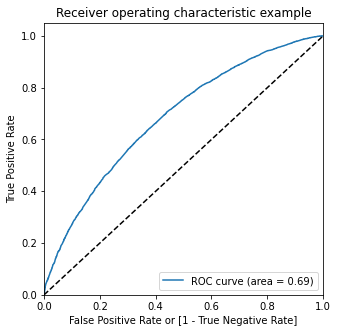

In [56]:
draw_roc(y_train_pred_final.gender, y_train_pred_final.gender_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.gender_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,gender,gender_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.771463,0,1,1,1,1,1,1,1,1,1,0,0
1,0,0.337723,1,0,1,1,1,1,0,0,0,0,0,0
2,1,0.667690,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.837831,3,1,1,1,1,1,1,1,1,1,1,0
4,1,0.830383,4,1,1,1,1,1,1,1,1,1,1,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.653684     1.000000     0.000000
0.1   0.1  0.654491     1.000000     0.002329
0.2   0.2  0.657026     0.999559     0.010481
0.3   0.3  0.664458     0.993390     0.043587
0.4   0.4  0.675635     0.971179     0.117784
0.5   0.5  0.686121     0.907104     0.269007
0.6   0.6  0.670104     0.766173     0.488771
0.7   0.7  0.581898     0.490481     0.754450
0.8   0.8  0.460679     0.212586     0.928964
0.9   0.9  0.369937     0.039221     0.994177


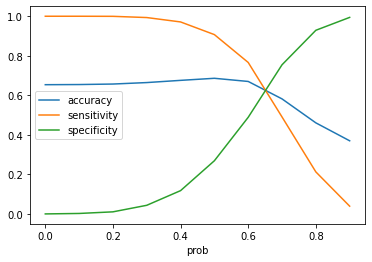

In [59]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.615 is the optimum point to take it as a cutoff probability.

In [60]:
def ks(data=None,target=None, prob=None):
    temp_data = data
    temp_data['target0'] = 1 - temp_data[target]
    temp_data['bucket'] = pd.qcut(temp_data[prob], 10)
    grouped = temp_data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob].apply('{:.4f}'.format)
    kstable['max_prob'] = grouped.max()[prob]
    kstable['males']   = grouped.sum()[target]
    kstable['females'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['male_rate'] = (kstable.males / temp_data[target].sum()).apply('{0:.2%}'.format)
    kstable['female_rate'] = (kstable.females / temp_data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_malerate']=(kstable.males / temp_data[target].sum()).cumsum()
    kstable['cum_femalerate']=(kstable.females / temp_data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_malerate']-kstable['cum_femalerate'], 3) * 100

    #Formating
    kstable['cum_malerate']= kstable['cum_malerate'].apply('{0:.2%}'.format)
    kstable['cum_femalerate']= kstable['cum_femalerate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [61]:
y_train_pred_final.gender = y_train_pred_final.gender.astype("int")
ks_table = ks(data=y_train_pred_final,target="gender", prob="gender_prob")

KS is 26.400000000000002% at decile 6


In [62]:
ks_table.head(10)

,min_prob,max_prob,males,females,male_rate,female_rate,cum_malerate,cum_femalerate,KS
Decile,,,,,,,,,
1,0.8367,1.000000,1501,235,13.23%,3.91%,13.23%,3.91%,9.3
2,0.7776,0.836694,1415,317,12.47%,5.27%,25.70%,9.18%,16.5
3,0.7417,0.777517,1323,416,11.66%,6.92%,37.36%,16.10%,21.3
4,0.7028,0.741507,1249,486,11.01%,8.09%,48.37%,24.19%,24.2
5,0.6674,0.702763,1217,519,10.73%,8.63%,59.10%,32.82%,26.3
6,0.6349,0.667384,897,469,7.91%,7.80%,67.00%,40.63%,26.4
7,0.5897,0.634869,1306,797,11.51%,13.26%,78.51%,53.88%,24.6
8,0.5315,0.589713,956,766,8.43%,12.74%,86.94%,66.63%,20.3
9,0.4565,0.531141,857,873,7.55%,14.52%,94.49%,81.15%,13.3


Based on the KS table the max KS is at decile 6 which has min probability of 0.6349 and max probability of 0.667384.

So, let's see the evaluations based on 0.6349

In [63]:
y_train_pred_final['final_predicted'] = y_train_pred_final.gender_prob.map( lambda x: 1 if x > 0.6349 else 0)

y_train_pred_final.head()

,gender,gender_prob,index,predicted,...,0.9,target0,bucket,final_predicted
0,1,0.771463,0,1,...,0,0,"(0.742, 0.778]",1
1,0,0.337723,1,0,...,0,1,"(-0.0009999999679, 0.456]",0
2,1,0.667690,2,1,...,0,0,"(0.667, 0.703]",1
3,1,0.837831,3,1,...,0,0,"(0.837, 1.0]",1
4,1,0.830383,4,1,...,0,0,"(0.778, 0.837]",1


In [64]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.final_predicted )
confusion2

array([[3569, 2442],
       [3744, 7602]])

In [65]:
resultsbasedOnConfusionMatrix(confusion2,y_train_pred_final.gender, y_train_pred_final.final_predicted)

Accuracy: 64.36%
True Positive: 7602
True Negative: 3569
False Positive: 2442
False Negative: 3744
Sensitivity: 67.00%
Specificity: 59.37%
Male predictive value: 75.69%
Female predictive value: 48.80%
Precision: 75.69%
Recall: 67.00%
F1 Score: 71.08%


### Precision and recall tradeoff

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.gender, y_train_pred_final.gender_prob)

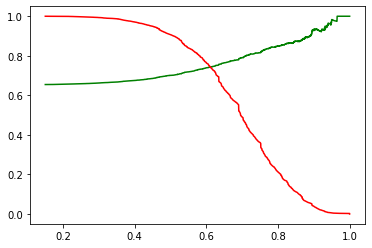

In [68]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [69]:
y_train_pred_final

,gender,gender_prob,index,predicted,...,0.9,target0,bucket,final_predicted
0,1,0.771463,0,1,...,0,0,"(0.742, 0.778]",1
1,0,0.337723,1,0,...,0,1,"(-0.0009999999679, 0.456]",0
2,1,0.667690,2,1,...,0,0,"(0.667, 0.703]",1
3,1,0.837831,3,1,...,0,0,"(0.837, 1.0]",1
4,1,0.830383,4,1,...,0,0,"(0.778, 0.837]",1
...,...,...,...,...,...,...,...,...,...
17352,1,0.461434,22768,0,...,0,0,"(0.456, 0.531]",0
17353,0,0.790485,22769,1,...,0,1,"(0.778, 0.837]",1
17354,1,0.816284,22770,1,...,0,0,"(0.778, 0.837]",1
17355,1,0.795383,22771,1,...,0,0,"(0.778, 0.837]",1


## Test data

In [70]:
X_test[numCol] = scaler.transform(X_test[numCol])

In [71]:
X_test = X_test[col]
X_test.head()

,bank financing,consumer finance,debit and credit,direct bank,...,cluster_84,cluster_86,cluster_87,cluster_88
5417,0,0,0,0,...,0,0,0,0
5418,0,0,0,0,...,0,0,0,0
5419,0,0,0,0,...,0,0,0,0
5420,0,0,0,0,...,0,0,0,0
5421,0,1,1,0,...,0,0,0,0


In [72]:
X_test_sm = sm.add_constant(X_test)

In [73]:
y_test_pred = res.predict(X_test_sm)

In [74]:
y_test_pred[:10]

5417    0.469240
5418    0.702504
5419    0.651857
5420    0.649698
5421    0.842237
5422    0.636795
5423    0.708210
5424    0.632675
5425    0.706583
5426    0.690679
dtype: float64

In [75]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [76]:
# Let's see the head
y_pred_1.head()

,0
5417,0.469240
5418,0.702504
5419,0.651857
5420,0.649698
5421,0.842237


In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [78]:
# Putting id to index
y_test_df['id'] = y_test_df.index

In [79]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [80]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [81]:
y_pred_final.head()

,gender,id,0
0,0,5417,0.469240
1,0,5418,0.702504
2,1,5419,0.651857
3,0,5420,0.649698
4,1,5421,0.842237


In [82]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'gender_prob'})

In [83]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['id','gender','gender_prob'], axis=1)

In [84]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,gender,gender_prob
0,5417,0,0.469240
1,5418,0,0.702504
2,5419,1,0.651857
3,5420,0,0.649698
4,5421,1,0.842237


In [89]:
y_pred_final['final_predicted'] = y_pred_final.gender_prob.map(lambda x: 1 if x > 0.6349 else 0)

In [90]:
y_pred_final.head()

,id,gender,gender_prob,final_predicted
0,5417,0,0.469240,0
1,5418,0,0.702504,1
2,5419,1,0.651857,1
3,5420,0,0.649698,1
4,5421,1,0.842237,1


In [91]:
confusion_test = metrics.confusion_matrix(y_pred_final.gender, y_pred_final.final_predicted )
confusion_test

array([[1140,  848],
       [1297, 2502]])

In [92]:
resultsbasedOnConfusionMatrix(confusion_test,y_pred_final.gender, y_pred_final.final_predicted)

Accuracy: 62.93%
True Positive: 2502
True Negative: 1140
False Positive: 848
False Negative: 1297
Sensitivity: 65.86%
Specificity: 57.34%
Male predictive value: 74.69%
Female predictive value: 46.78%
Precision: 74.69%
Recall: 65.86%
F1 Score: 70.00%


##### With simple logistice regression model we got the male prediction value of ~75% and female prediction value of ~47% with an accuracy of ~63%

##### We will try to increase the model performance using XGboost

## XGBoost classification 

In [93]:
#Import required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [94]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'age') \
                             & (train_data.columns != 'gender'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

In [95]:
#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'age') \
                             & (test_data.columns != 'gender'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

In [96]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 360, 40),
        'learning_rate': [0.1, 0.01, 0.05]
 }

In [97]:
# A parameter grid for XGBoost
params1 = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4],
        'n_estimators': range(60, 140, 40),
        'learning_rate': [0.1, 0.01]
 }

In [98]:
estimator = XGBClassifier(objective= 'binary:logistic',eval_metric='logloss', seed=42)

In [99]:
clf = GridSearchCV(estimator=estimator, 
                   param_grid=params1,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [100]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 1/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.668 total time=   0.9s
[CV 2/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 2/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.641 total time=   0.9s
[CV 3/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 3/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.669 total time=   0.9s
[CV 4/5; 1/192] 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [101]:
print("Best parameters:", clf.best_params_)
print("Highest ROC: ", clf.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Highest ROC:  0.6716793961885441


In [102]:
# A parameter grid for XGBoost
params2 = {
        'min_child_weight': [10],
        'gamma': [ 2, 5],
        'subsample': [ 1.0],
        'colsample_bytree': [ 1.0],
        'max_depth': [ 5],
        'n_estimators': range(140, 360, 40),
        'learning_rate': [ 0.05]
 }

In [103]:
clf2 = GridSearchCV(estimator=estimator, 
                   param_grid=params2,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [104]:
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 1/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.674 total time=   2.9s
[CV 2/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 2/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.646 total time=   2.9s
[CV 3/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 3/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.673 total time=   2.9s
[CV 4/5; 1/12] STA

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [105]:
print("Best parameters:", clf2.best_params_)
print("Highest ROC: ", clf2.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 260, 'subsample': 1.0}
Highest ROC:  0.6713326280273908


Let's combine best parameters from both and get the best paramaters.

In [106]:
# A parameter grid for XGBoost
params3 = {
        'min_child_weight': [5,10],
        'gamma': [1.5, 2],
        'subsample': [ 0.8,1.0],
        'colsample_bytree': [ 0.6, 1.0],
        'max_depth': [4, 5],
        'n_estimators': range(100, 260, 40),
        'learning_rate': [0.1, 0.05]
 }

In [107]:
clf3 = GridSearchCV(estimator=estimator, 
                   param_grid=params3,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [108]:
clf3.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8
[CV 1/5; 1/256] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.676 total time=   1.5s
[CV 2/5; 1/256] START colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8
[CV 2/5; 1/256] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.646 total time=   1.5s
[CV 3/5; 1/256] START colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8
[CV 3/5; 1/256] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.675 total time=   1.5s
[CV 4/5; 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [109]:
print("Best parameters:", clf3.best_params_)
print("Highest ROC: ", clf3.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 180, 'subsample': 0.8}
Highest ROC:  0.6729853229607521


Based on the 3 params, for last param we got highest ROC.So, we will build and test the model based on it.

In [110]:
xgb = XGBClassifier(n_estimators=180,subsample=0.8,min_child_weight=5,\
                          max_depth=4,learning_rate=0.1,gamma=1.5,colsample_bytree=0.6,\
                          objective= 'binary:logistic',eval_metric='logloss', seed=42)

In [111]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='logloss', gamma=1.5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [112]:
# make predictions for test data
predictions = xgb.predict(X_test)

In [113]:
predictions = [round(value) for value in predictions]

In [114]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[ 468 1520]
 [ 332 3467]]


In [115]:
resultsbasedOnConfusionMatrix(confusion,y_test, predictions)

Accuracy: 68.00%
True Positive: 3467
True Negative: 468
False Positive: 1520
False Negative: 332
Sensitivity: 91.26%
Specificity: 23.54%
Male predictive value: 69.52%
Female predictive value: 58.50%
Precision: 69.52%
Recall: 91.26%
F1 Score: 78.92%


In logistic regression we got a male prediction score of 73% and female prediction score of 47%. But with xgboost we got a male prediction score of 70% and female prediction score of 58%.

Even though male prediction score is reduced by a small ammount, female prediction score is increased drastically. And accuracy and f1 score is also increased. So, out of these two. I prefer xgboost.

## Stacking Model

In [116]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'age') \
                             & (train_data.columns != 'gender'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'age') \
                             & (test_data.columns != 'gender'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

Let's find the best parameters for random forest

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [118]:
rfc=RandomForestClassifier(random_state=42)

In [119]:
param_grid = { 
    'n_estimators': [60,100,140,180,220],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [120]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [60, 100, 140, 180, 220]},
             scoring='roc_auc')

In [121]:
print("Best parameters:", CV_rfc.best_params_)
print("Highest ROC: ", CV_rfc.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 220}
Highest ROC:  0.6572164632998119


In [122]:
#Build random forest model with best parameters
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 220, max_depth=8, criterion='gini')

In [123]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=220, random_state=42)

In [124]:
pred=rfc1.predict(X_test)

In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[  55 1933]
 [  22 3777]]


In [126]:
resultsbasedOnConfusionMatrix(confusion,y_test, pred)

Accuracy: 66.22%
True Positive: 3777
True Negative: 55
False Positive: 1933
False Negative: 22
Sensitivity: 99.42%
Specificity: 2.77%
Male predictive value: 66.15%
Female predictive value: 71.43%
Precision: 66.15%
Recall: 99.42%
F1 Score: 79.44%


In [127]:
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier

In [128]:
# x,y to np 
X_train_np = X_train.values
y_train_np = y_train.values

In [129]:
clf1 = LogisticRegression()
stacking_demo = StackingCVClassifier(classifiers=[clf1, rfc1], meta_classifier=xgb, use_probas=True, cv=3)

In [130]:
for clf, label in zip([clf1, rfc1, xgb], 
                      ['lr', 
                       'Random Forest', 
                       'xgb']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.66 (+/- 0.01) [lr]
Accuracy: 0.66 (+/- 0.01) [Random Forest]
Accuracy: 0.67 (+/- 0.01) [xgb]


In [131]:
# Fit on train data 
sclf_fit = stacking_demo.fit(X_train_np, y_train_np.reshape(-1))

In [132]:
train_pred = sclf_fit.predict_proba(X_train)

In [133]:
# Probabilities for classes male,female
zeros = [i[0] for i in train_pred]
ones  = [i[1] for i in train_pred]

In [134]:
train_predictions = ones

In [135]:
# Converting train_predictions to a dataframe which is an array
y_train_pred = pd.DataFrame(train_predictions)

In [136]:
# Let's see the head
y_train_pred.head()

,0
0,0.891262
1,0.468718
2,0.787749
3,0.778557
4,0.847644


In [137]:
# Putting id to index
y_train['id'] = y_train.index

# Removing index for both dataframes to append them side by side 
y_train_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred
y_train_pred_final = pd.concat([y_train, y_train_pred],axis=1)

In [139]:
y_train_pred_final.head()

,gender,id,0
0,1,0,0.891262
1,0,1,0.468718
2,1,2,0.787749
3,1,3,0.778557
4,1,4,0.847644


In [140]:
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 0 : 'gender_prob'})

# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex(['id','gender','gender_prob'], axis=1)

# Let's see the head of y_train_pred_final
y_train_pred_final.head()

,id,gender,gender_prob
0,0,1,0.891262
1,1,0,0.468718
2,2,1,0.787749
3,3,1,0.778557
4,4,1,0.847644


In [141]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,id,gender,gender_prob,predicted
0,0,1,0.891262,1
1,1,0,0.468718,0
2,2,1,0.787749,1
3,3,1,0.778557,1
4,4,1,0.847644,1


In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted)
print(confusion)

[[ 1537  4474]
 [  915 10431]]


In [143]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 68.95%
True Positive: 10431
True Negative: 1537
False Positive: 4474
False Negative: 915
Sensitivity: 91.94%
Specificity: 25.57%
Male predictive value: 69.98%
Female predictive value: 62.68%
Precision: 69.98%
Recall: 91.94%
F1 Score: 79.47%


In [144]:
y_train_pred_final.gender = y_train_pred_final.gender.astype("int")

ks_table = ks(data=y_train_pred_final,target="gender", prob="gender_prob")

ks_table

KS is 27.0% at decile 6


,min_prob,max_prob,males,females,male_rate,female_rate,cum_malerate,cum_femalerate,KS
Decile,,,,,,,,,
1,0.8203,0.970877,1548,188,13.64%,3.13%,13.64%,3.13%,10.5
2,0.7654,0.820257,1421,315,12.52%,5.24%,26.17%,8.37%,17.8
3,0.7336,0.765397,1336,399,11.78%,6.64%,37.94%,15.01%,22.9
4,0.6929,0.733542,1252,484,11.03%,8.05%,48.98%,23.06%,25.9
5,0.6616,0.692859,1165,565,10.27%,9.40%,59.25%,32.46%,26.8
6,0.6342,0.661562,1144,596,10.08%,9.92%,69.33%,42.37%,27.0
7,0.5940,0.634092,1033,704,9.10%,11.71%,78.43%,54.08%,24.3
8,0.5441,0.593886,1006,727,8.87%,12.09%,87.30%,66.18%,21.1
9,0.4733,0.544105,853,878,7.52%,14.61%,94.82%,80.79%,14.0


The max male prediction, ~70% is the cumilate of till decile 6. Whereas for female prediction the max predictive rate is from decide 5 which is ~70%.

The probability range is from 0.6390 to 0.6725. let us see the graphs to decide the cutoff.

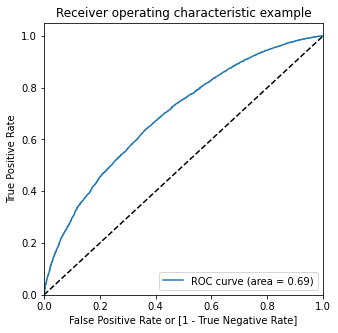

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.gender, y_train_pred_final.gender_prob,\
                                         drop_intermediate = False )

draw_roc(y_train_pred_final.gender, y_train_pred_final.gender_prob)

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.gender_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,id,gender,gender_prob,predicted,...,0.6,0.7,0.8,0.9
0,0,1,0.891262,1,...,1,1,1,0
1,1,0,0.468718,0,...,0,0,0,0
2,2,1,0.787749,1,...,1,1,0,0
3,3,1,0.778557,1,...,1,1,0,0
4,4,1,0.847644,1,...,1,1,1,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.653684     1.000000     0.000000
0.1   0.1  0.653684     1.000000     0.000000
0.2   0.2  0.655989     0.999471     0.007653
0.3   0.3  0.663363     0.995505     0.036433
0.4   0.4  0.674944     0.980874     0.097488
0.5   0.5  0.689520     0.919355     0.255698
0.6   0.6  0.670392     0.773488     0.475794
0.7   0.7  0.581034     0.473295     0.784395
0.8   0.8  0.442012     0.169487     0.956413
0.9   0.9  0.367402     0.034550     0.995675


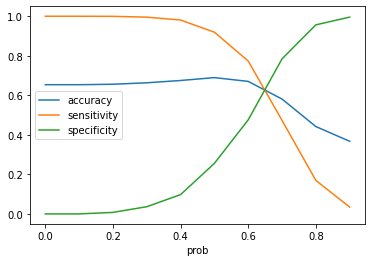

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

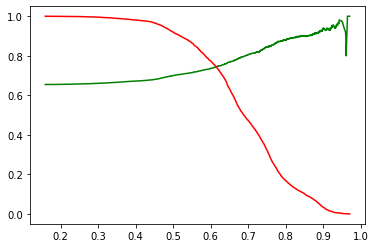

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.gender, y_train_pred_final.gender_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [166]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,id,gender,gender_prob,predicted,...,0.6,0.7,0.8,0.9
0,0,1,0.891262,1,...,1,1,1,0
1,1,0,0.468718,0,...,0,0,0,0
2,2,1,0.787749,1,...,1,1,0,0
3,3,1,0.778557,1,...,1,1,0,0
4,4,1,0.847644,1,...,1,1,1,0


In [167]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted)
print(confusion)

[[ 1537  4474]
 [  915 10431]]


In [168]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 68.95%
True Positive: 10431
True Negative: 1537
False Positive: 4474
False Negative: 915
Sensitivity: 91.94%
Specificity: 25.57%
Male predictive value: 69.98%
Female predictive value: 62.68%
Precision: 69.98%
Recall: 91.94%
F1 Score: 79.47%


In [169]:
test_pred = sclf_fit.predict_proba(X_test)

# Probabilities for classes male,female
zeros = [i[0] for i in test_pred]
ones  = [i[1] for i in test_pred]

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(ones)

In [171]:
# Let's see the head
y_pred.head()

,0
0,0.477156
1,0.683172
2,0.497115
3,0.663745
4,0.772857


In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting id to index
y_test_df['id'] = y_test_df.index

In [173]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [175]:
y_pred_final.head()

,gender,id,0
0,0,0,0.477156
1,0,1,0.683172
2,1,2,0.497115
3,0,3,0.663745
4,1,4,0.772857


In [176]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'gender_prob'})

In [177]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['id','gender','gender_prob'], axis=1)

In [178]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,gender,gender_prob
0,0,0,0.477156
1,1,0,0.683172
2,2,1,0.497115
3,3,0,0.663745
4,4,1,0.772857


In [179]:
y_pred_final['final_predicted'] = y_pred_final.gender_prob.map(lambda x: 1 if x > 0.49 else 0)

In [180]:
y_pred_final.head()

,id,gender,gender_prob,final_predicted
0,0,0,0.477156,0
1,1,0,0.683172,1
2,2,1,0.497115,1
3,3,0,0.663745,1
4,4,1,0.772857,1


In [181]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.gender, y_pred_final.final_predicted)
print(confusion)

[[ 418 1570]
 [ 284 3515]]


In [182]:
resultsbasedOnConfusionMatrix(confusion,y_pred_final.gender, y_pred_final.final_predicted)

Accuracy: 67.96%
True Positive: 3515
True Negative: 418
False Positive: 1570
False Negative: 284
Sensitivity: 92.52%
Specificity: 21.03%
Male predictive value: 69.12%
Female predictive value: 59.54%
Precision: 69.12%
Recall: 92.52%
F1 Score: 79.13%


I stacking, we have got ~69% male predictive rate and ~60% female predictive rate which is higher than logistic regression and xgboost alone.

The Accuracy is also ~68% with F1 score of ~79%

In [183]:
import numpy as np
import pandas as pd
import pickle

In [184]:
# save the model to disk
filename = 'gender_model.pkl'
pickle.dump(sclf_fit, open(filename, 'wb'))

In [185]:
test_data = pd.read_csv("test_data.csv")


test_data.drop("Unnamed: 0", axis=1, inplace=True)

#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'age') & (test_data.columns != 'gender'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

In [186]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(X_test)
# Probabilities for classes male,female
zeros = [i[0] for i in result]
ones  = [i[1] for i in result]

# Converting y_pred to a dataframe which is an array
test_pred = pd.DataFrame(ones)
# Converting y_test to dataframe
test_df = pd.DataFrame(y_test)

# Putting id to index
test_df['id'] = test_df.index

# Removing index for both dataframes to append them side by side 
test_pred.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred
test_final = pd.concat([test_df, test_pred],axis=1)

# Renaming the column 
test_final= test_final.rename(columns={ 0 : 'gender_prob'})

# Rearranging the columns
test_final = test_final.reindex(['id','gender','gender_prob'], axis=1)

test_final['final_predicted'] = test_final.gender_prob.map(lambda x: 1 if x > 0.6251 else 0)

test_final.head()

,id,gender,gender_prob,final_predicted
0,0,0,0.825882,1
1,1,0,0.797618,1
2,2,1,0.700102,1
3,3,0,0.709565,1
4,4,1,0.677176,1


In [187]:
# Confusion matrix 
confusion = metrics.confusion_matrix(test_final.gender, test_final.final_predicted)
print(confusion)

[[ 523 1473]
 [ 811 3015]]


In [188]:
resultsbasedOnConfusionMatrix(confusion,test_final.gender, test_final.final_predicted)

Accuracy: 60.77%
True Positive: 3015
True Negative: 523
False Positive: 1473
False Negative: 811
Sensitivity: 78.80%
Specificity: 26.20%
Male predictive value: 67.18%
Female predictive value: 39.21%
Precision: 67.18%
Recall: 78.80%
F1 Score: 72.53%
